In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Consumer Spending vs Employment vs Unemployement Claims at AZ vs CO vs National Level

In [64]:
consum_spend_state = pd.read_csv('data/Affinity - State - Daily.csv', parse_dates={'date': ['year', 'month', 'day']})
consum_spend_nat = pd.read_csv('data/Affinity - National - Daily.csv', parse_dates={'date': ['year', 'month', 'day']})

employ_state = pd.read_csv('data/Employment - State - Daily.csv', parse_dates={'date': ['year', 'month', 'day']})
employ_nat = pd.read_csv('data/Employment - National - Daily.csv', parse_dates={'date': ['year', 'month', 'day']})

ui_claim_state = pd.read_csv('data/UI Claims - State - Weekly.csv', parse_dates={'date': ['year', 'month', 'day_endofweek']})
ui_claim_nat = pd.read_csv('data/UI Claims - National - Weekly.csv', parse_dates={'date': ['year', 'month', 'day_endofweek']})

#### Consumer Spending

In [73]:
consum_spend_state.head() # spend_all for AZ and CO and Nat
consum_spend_nat.head()

,date,freq,spend_acf,spend_aer,spend_all,spend_apg,spend_grf,spend_hcs,spend_tws,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_all_q2,spend_all_q3,spend_retail_no_grocery,spend_retail_w_grocery,provisional
0,2019-01-07,d,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0
1,2019-01-08,d,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0
2,2019-01-09,d,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0
3,2019-01-10,d,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0
4,2019-01-11,d,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0


In [135]:
consum_spend_st_non_null = consum_spend_state.loc[consum_spend_state.loc[:, 'spend_all'] != '.']

consum_spend_az = consum_spend_st_non_null.loc[consum_spend_st_non_null.loc[:, 'statefips'] == 4]
consum_spend_co = consum_spend_st_non_null.loc[consum_spend_st_non_null.loc[:, 'statefips'] == 8]

options = [4, 8]
consum_spend_az_co = consum_spend_st_non_null.loc[consum_spend_st_non_null.loc[:, 'statefips'].isin(options)]

consum_spend_nat_nn = consum_spend_nat.loc[consum_spend_state.loc[:, 'spend_all'] != '.']
consum_spend_nat_nn.insert(loc=1, column='statefips', value=0)
consum_spend_nat_nn

,date,statefips,freq,spend_acf,spend_aer,spend_all,spend_apg,spend_grf,spend_hcs,spend_tws,spend_all_inchigh,spend_all_inclow,spend_all_incmiddle,spend_all_q2,spend_all_q3,spend_retail_no_grocery,spend_retail_w_grocery,provisional
602,2020-08-31,0,d,-.281,-.533,-.0402,-.0807,.0854,-.101,-.443,-.0675,.000601,-.0376,-.0312,-.0431,.104,.0987,0
603,2020-09-01,0,d,-.265,-.347,-.0175,-.0631,.0944,-.132,-.415,-.039,.018,-.0167,-.0129,-.0199,.116,.11,0
604,2020-09-02,0,d,-.263,-.316,-.0144,-.0595,.0961,-.133,-.405,-.0368,.0242,-.0136,-.0102,-.0166,.118,.111,0
605,2020-09-03,0,d,-.257,-.35,-.0186,-.0561,.104,-.139,-.41,-.0461,.0291,-.0172,-.0121,-.0215,.116,.113,0
606,2020-09-04,0,d,-.234,-.41,-.033,-.0315,.124,-.212,-.417,-.0635,.0171,-.0301,-.0254,-.0341,.118,.121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,2021-03-04,0,d,-.15,-.458,.034,.0453,.166,-.0749,-.334,.00662,.0469,.0422,.0391,.0445,.202,.191,1
788,2021-03-05,0,d,-.145,-.438,.055,.0567,.18,.00327,-.338,.0304,.0676,.0615,.0589,.0633,.212,.202,1
789,2021-03-06,0,d,-.141,-.395,.0798,.0682,.192,.0195,-.325,.0538,.101,.0848,.0836,.0856,.225,.215,1
790,2021-03-07,0,d,-.137,-.339,.11,.0843,.216,.0379,-.304,.0773,.143,.117,.118,.117,.246,.237,1


In [139]:
consumer_spending = pd.merge(
                            consum_spend_az_co,
                            consum_spend_nat_nn,
                            how='outer'
                            )

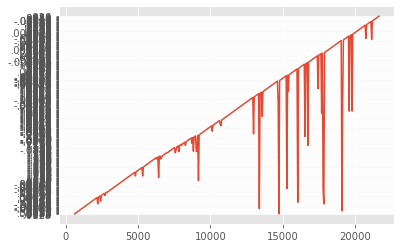

In [144]:
fig, ax = plt.subplots()



ax.plot(consum_spend_az.loc[:,'spend_all'])
ax.plot(consum_spend)

#### Employment

In [96]:
employ_state.head() #emp_combined for AZ and CO and Nat
employ_nat.head()

,date,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70,emp_combined_retail,emp_combined_retail_inclow,emp_combined_retail_incmiddle,emp_combined_retail_inchigh,emp_combined_advance
0,2020-01-14,-0.002890,-0.001820,-0.004330,-0.001130,-.00171,-.00202,-.00398,-.00343,-.00133,-.000205,-.00432,.0055,0
1,2020-01-15,-0.001900,-0.001150,-0.002850,-0.000768,-.00111,-.00112,-.00257,-.00254,-.00096,-.000222,-.00307,.00393,0
2,2020-01-16,-0.000962,-0.000411,-0.001490,-0.000437,-.000515,-.000275,-.00127,-.0017,-.000592,-6.80e-06,-.00193,.00233,0
3,2020-01-17,-0.000113,0.000289,-0.000269,-0.000133,.0000455,.000474,-.000101,-.000947,-.00026,.000271,-.00092,.000777,0
4,2020-01-18,0.000625,0.000883,0.000795,0.000134,.000547,.00108,.000875,-.00018,.0000431,.000549,-1.67e-06,-.000664,0


In [106]:
employ_az = employ_state.loc[employ_state.loc[:, 'statefips'] == 4]
employ_co = employ_state.loc[employ_state.loc[:, 'statefips'] == 8]

employ_nat

,date,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70,emp_combined_retail,emp_combined_retail_inclow,emp_combined_retail_incmiddle,emp_combined_retail_inchigh,emp_combined_advance
0,2020-01-14,-0.002890,-0.001820,-0.004330,-0.001130,-.00171,-.00202,-.00398,-.00343,-.00133,-.000205,-.00432,.0055,0
1,2020-01-15,-0.001900,-0.001150,-0.002850,-0.000768,-.00111,-.00112,-.00257,-.00254,-.00096,-.000222,-.00307,.00393,0
2,2020-01-16,-0.000962,-0.000411,-0.001490,-0.000437,-.000515,-.000275,-.00127,-.0017,-.000592,-6.80e-06,-.00193,.00233,0
3,2020-01-17,-0.000113,0.000289,-0.000269,-0.000133,.0000455,.000474,-.000101,-.000947,-.00026,.000271,-.00092,.000777,0
4,2020-01-18,0.000625,0.000883,0.000795,0.000134,.000547,.00108,.000875,-.00018,.0000431,.000549,-1.67e-06,-.000664,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2021-03-01,-0.103000,-0.293000,-0.074100,-0.008700,.,.,.,.,.,.,.,.,1
413,2021-03-02,-0.103000,-0.293000,-0.073600,-0.007790,.,.,.,.,.,.,.,.,1
414,2021-03-03,-0.102000,-0.293000,-0.072700,-0.006720,.,.,.,.,.,.,.,.,1
415,2021-03-04,-0.101000,-0.292000,-0.071600,-0.005500,.,.,.,.,.,.,.,.,1


#### Unemployment Claims